In [4]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from skimage.io import imshow

In [6]:
image = cv2.imread('pic1.jpeg')

shifted = cv2.pyrMeanShiftFiltering(image, 21, 51)

shifted_gray = cv2.cvtColor(shifted, cv2.COLOR_BGR2GRAY)

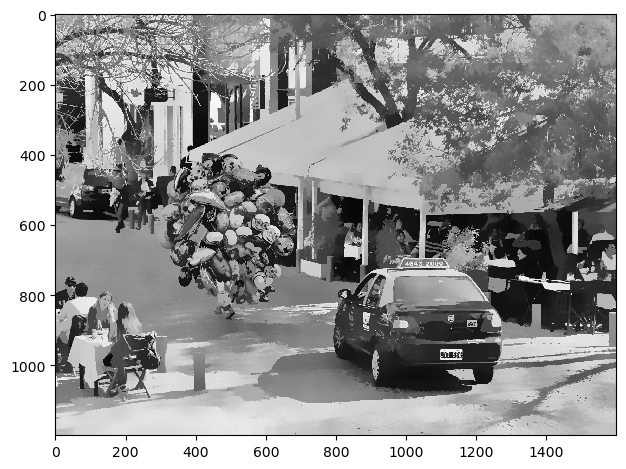

In [7]:
imshow(shifted_gray)

In [8]:
_, binary_mask = cv2.threshold(shifted_gray, 0, 255, cv2.THRESH_BINARY | cv2.THRESH_OTSU)

In [9]:
contours, _ = cv2.findContours(binary_mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

In [10]:
segmented_image_color = np.zeros_like(image)
for i, contour in enumerate(contours):
    color = [int(c) for c in np.random.randint(0, 255, 3)]
    cv2.drawContours(segmented_image_color, [contour], -1, color, cv2.FILLED)

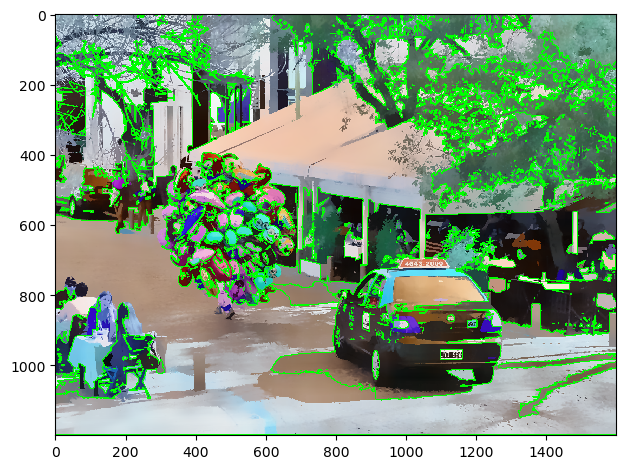

In [11]:
mean_shift_with_contours = shifted.copy()
cv2.drawContours(mean_shift_with_contours, contours, -1, (0, 255, 0), 2)
imshow(mean_shift_with_contours)

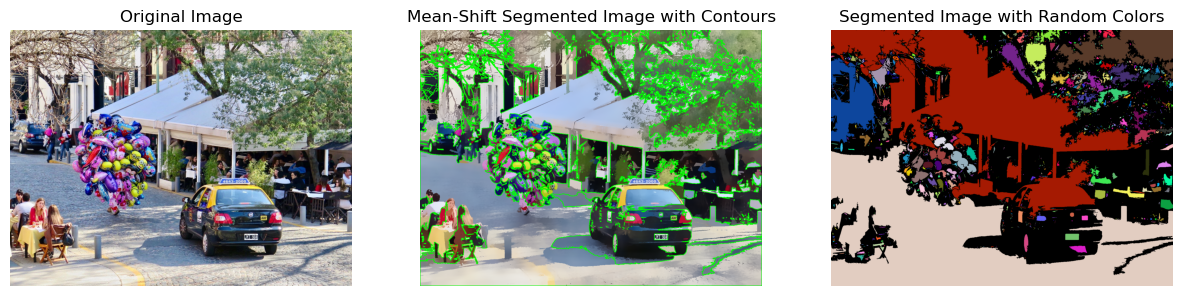

In [12]:
plt.figure(figsize=(15, 7))
plt.subplot(1, 3, 1)
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(cv2.cvtColor(mean_shift_with_contours, cv2.COLOR_BGR2RGB))
plt.title('Mean-Shift Segmented Image with Contours')
plt.axis('off')

plt.subplot(1, 3, 3)
plt.imshow(cv2.cvtColor(segmented_image_color, cv2.COLOR_BGR2RGB))
plt.title('Segmented Image with Random Colors')
plt.axis('off')

plt.show()